Training Feedforward ANN...
Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11107/11107 ━━━━━━━━━━━━━━━━━━━━ 5s 404us/step - accuracy: 0.9069 - loss: 0.5296 - val_accuracy: 0.8119 - val_loss: 0.3631
Epoch 2/10
11107/11107 ━━━━━━━━━━━━━━━━━━━━ 4s 389us/step - accuracy: 0.9554 - loss: 0.1675 - val_accuracy: 0.8874 - val_loss: 0.3628
Epoch 3/10
11107/11107 ━━━━━━━━━━━━━━━━━━━━ 4s 387us/step - accuracy: 0.9600 - loss: 0.1418 - val_accuracy: 0.7611 - val_loss: 1.4034
Epoch 4/10
11107/11107 ━━━━━━━━━━━━━━━━━━━━ 4s 386us/step - accuracy: 0.9569 - loss: 0.1463 - val_accuracy: 0.8283 - val_loss: 0.4070
Epoch 5/10
11107/11107 ━━━━━━━━━━━━━━━━━━━━ 4s 390us/step - accuracy: 0.9593 - loss: 0.1387 - val_accuracy: 0.6750 - val_loss: 0.5338
Epoch 6/10
11107/11107 ━━━━━━━━━━━━━━━━━━━━ 4s 390us/step - accuracy: 0.9637 - loss: 0.1258 - val_accuracy: 0.7521 - val_loss: 0.4466
Epoch 7/10
11107/11107 ━━━━━━━━━━━━━━━━━━━━ 4s 387us/step - accuracy: 0.9602 - loss: 0.1335 - val_accuracy: 0.9251 - val_loss: 0.4242
Epoch 8/10
11107/11107 ━━━━━━━━━━━━━━━━━━━━ 4s 388us/step - accuracy: 0.9

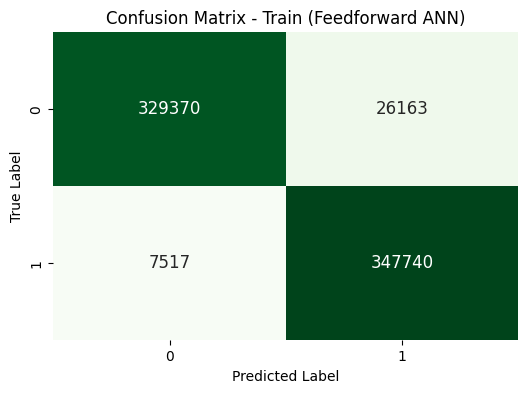

Confusion Matrix (Test):
[[82332  6379]
 [ 1870 87117]]


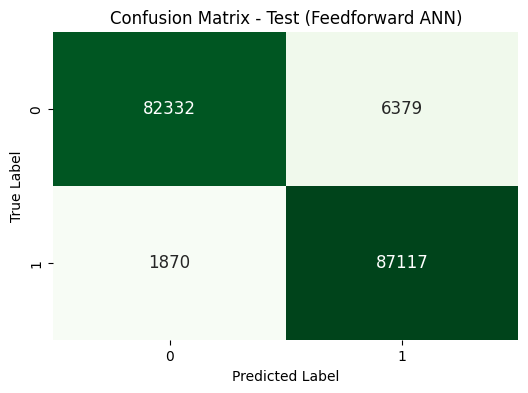

Shallow ANN - Train Accuracy: 0.9398, Test Accuracy: 0.9396, F1 Score (Train): 0.9385, F1 Score (Test): 0.9382, Time Elapsed: 38.17 seconds
Shallow ANN - Sensitivity (Train): 0.9652, Specificity (Train): 0.8861,Precision (Train): 0.8944
Shallow ANN - Sensitivity (Test): 0.9659, Specificity (Test): 0.8876,Precision (Test): 0.8961
Confusion Matrix (Train):
[[342021  13512]
 [ 29249 326008]]


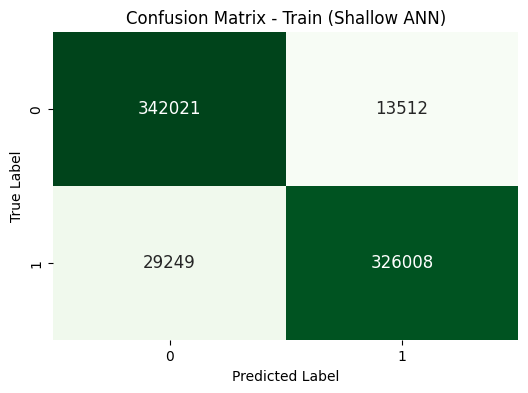

Confusion Matrix (Test):
[[85378  3333]
 [ 7407 81580]]


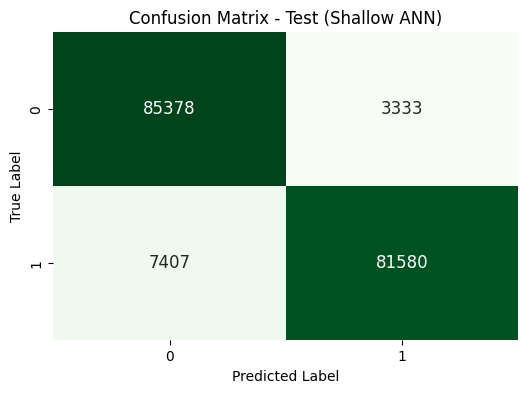

Deep ANN - Train Accuracy: 0.9346, Test Accuracy: 0.9353, F1 Score (Train): 0.9370, F1 Score (Test): 0.9378, Time Elapsed: 87.61 seconds
Deep ANN - Sensitivity (Train): 0.9652, Specificity (Train): 0.8861,Precision (Train): 0.8944
Deep ANN - Sensitivity (Test): 0.9659, Specificity (Test): 0.8876,Precision (Test): 0.8961
Confusion Matrix (Train):
[[318624  36909]
 [  9609 345648]]


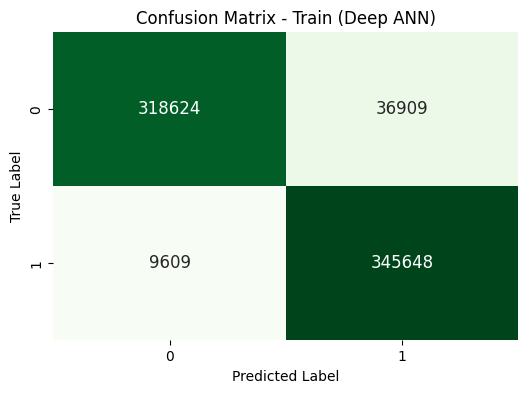

Confusion Matrix (Test):
[[79646  9065]
 [ 2427 86560]]


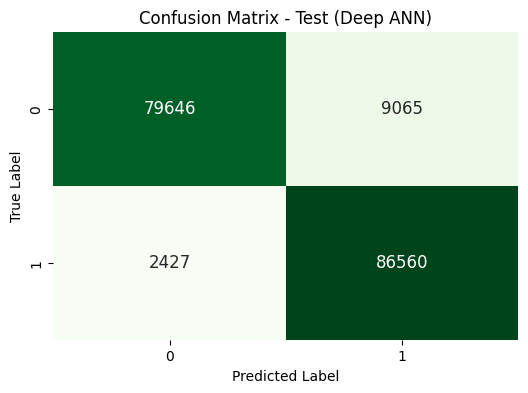

Hybrid ANN - Train Accuracy: 0.9256, Test Accuracy: 0.9268, F1 Score (Train): 0.9284, F1 Score (Test): 0.9297, Time Elapsed: 90.10 seconds
Hybrid ANN - Sensitivity (Train): 0.9652, Specificity (Train): 0.8861,Precision (Train): 0.8944
Hybrid ANN - Sensitivity (Test): 0.9659, Specificity (Test): 0.8876,Precision (Test): 0.8961
Confusion Matrix (Train):
[[315052  40481]
 [ 12371 342886]]


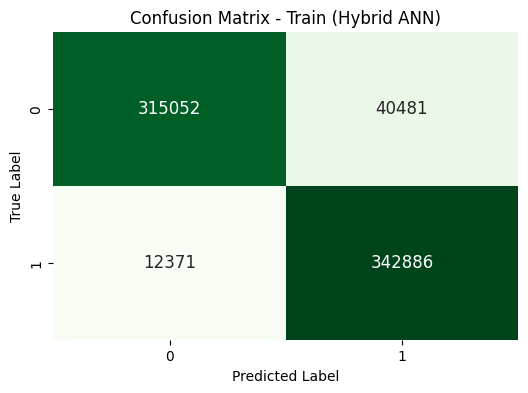

Confusion Matrix (Test):
[[78741  9970]
 [ 3038 85949]]


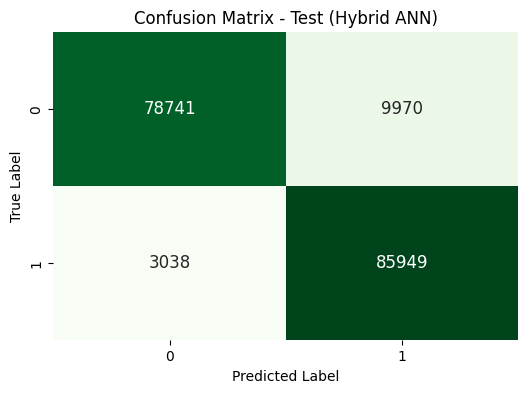

5554/5554 ━━━━━━━━━━━━━━━━━━━━ 1s 207us/step
5554/5554 ━━━━━━━━━━━━━━━━━━━━ 1s 198us/step
5554/5554 ━━━━━━━━━━━━━━━━━━━━ 2s 269us/step
5554/5554 ━━━━━━━━━━━━━━━━━━━━ 2s 299us/step


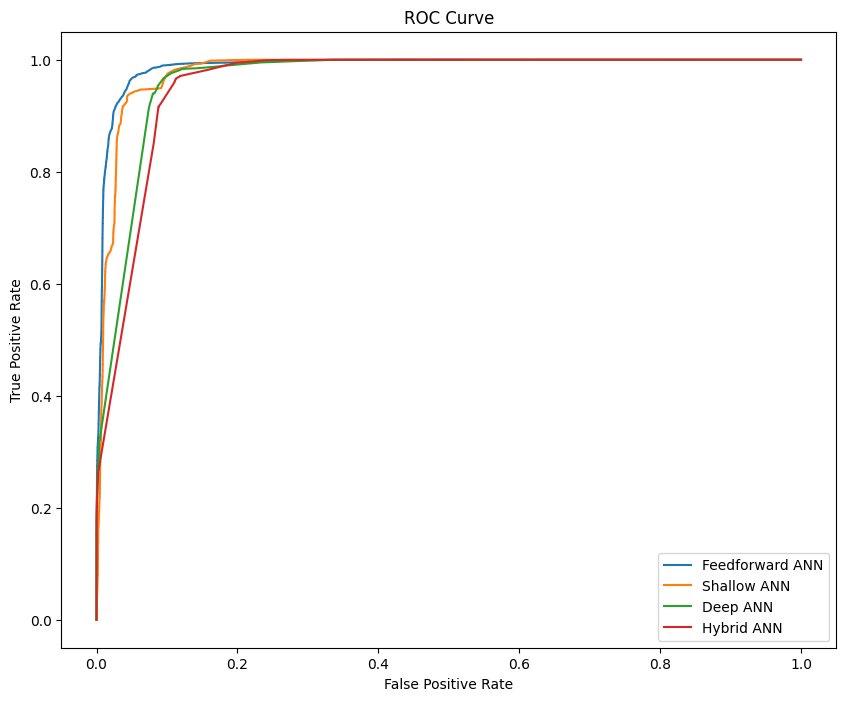

5554/5554 ━━━━━━━━━━━━━━━━━━━━ 1s 209us/step
5554/5554 ━━━━━━━━━━━━━━━━━━━━ 1s 198us/step
5554/5554 ━━━━━━━━━━━━━━━━━━━━ 2s 269us/step
5554/5554 ━━━━━━━━━━━━━━━━━━━━ 2s 307us/step


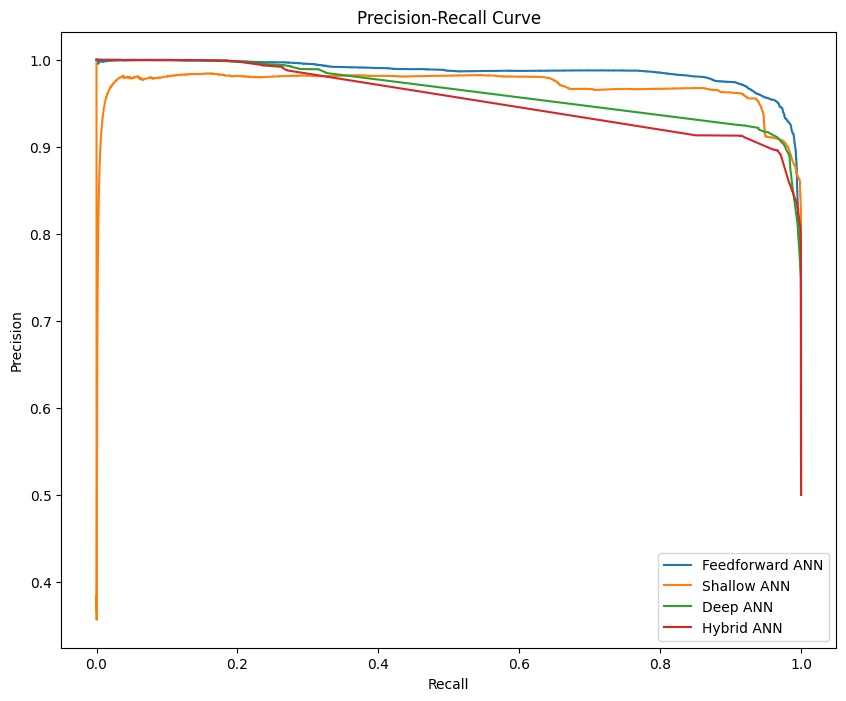

In [8]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.regularizers import l2
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import time

# Load data into a DataFrame
data = pd.read_csv('/Users/hardeesh/CSV/SF_Data.csv')

# Separate features (X) and target variable (y)
X = data.drop(columns=['Label'])
y = data['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize features by removing the mean and scaling to unit variance
# # Scale features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# X.head()

# Define your models
def create_feedforward_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim, kernel_regularizer=l2(l2=0.01)),
        BatchNormalization(),
        Dense(32, activation='relu', kernel_regularizer=l2(l2=0.01)),
        BatchNormalization(),
        Dense(1, activation='sigmoid')
    ])
    opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_shallow_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim, kernel_regularizer=l2(l2=0.0001)),
        BatchNormalization(),
        Dense(1, activation='sigmoid')
    ])
    opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_deep_model(input_dim):
    model = Sequential([
        Dense(128, activation='sigmoid', input_dim=input_dim, kernel_regularizer=l2(l2=0.0001)),
        BatchNormalization(),
        Dense(64, activation='sigmoid', kernel_regularizer=l2(l2=0.0001)),
        BatchNormalization(),
        Dense(32, activation='sigmoid', kernel_regularizer=l2(l2=0.0001)),
        BatchNormalization(),
        Dense(16, activation='sigmoid', kernel_regularizer=l2(l2=0.0001)),
        BatchNormalization(),
        Dense(8, activation='sigmoid', kernel_regularizer=l2(l2=0.0001)),
        BatchNormalization(),
        Dense(4, activation='sigmoid', kernel_regularizer=l2(l2=0.0001)),
        BatchNormalization(),
        Dense(1, activation='sigmoid')
    ])
    opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

from tensorflow.keras.layers import Concatenate

def create_hybrid_model(input_dim):
    shallow_model = create_shallow_model(input_dim)
    deep_model = create_deep_model(input_dim)

    # Ensure input_dim is passed to both shallow and deep models

    for layer in shallow_model.layers:
        layer.trainable = False

    input_layer = tf.keras.Input(shape=(input_dim,))
    shallow_output = shallow_model(input_layer)
    deep_output = deep_model(input_layer)

    concatenated_output = Concatenate()([shallow_output, deep_output])
    
    fusion_output = Dense(32,activation='relu',kernel_regularizer=l2(l2=0.001))(concatenated_output)
    BatchNormalization(),
    output_layer = Dense(1, activation='sigmoid')(fusion_output)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate each model
models = {
    'Feedforward ANN': create_feedforward_model(X_train.shape[1]),
    'Shallow ANN': create_shallow_model(X_train.shape[1]),
    'Deep ANN': create_deep_model(X_train.shape[1]),
    'Hybrid ANN': create_hybrid_model(X_train.shape[1])
}

import time  # Make sure this import is at the top of your file

results = {}
for name, model in models.items():
    start_time = time.time()  # Start timing
    print(f'Training {name}...')
    history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))
    end_time = time.time()  # End timing
    elapsed_time = end_time - start_time  # Calculate elapsed time
    
    y_pred_train = (model.predict(X_train) > 0.5).astype("int32")
    y_pred_test = (model.predict(X_test) > 0.5).astype("int32")
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    
    #  # Calculate specificity and sensitivity
    tn_train, fp_train, fn_train, tp_train = cm_train.ravel()
    specificity_train = tn_train / (tn_train + fp_train)
    sensitivity_train = tp_train / (tp_train + fn_train)
    precision_train = tp_train / (tp_train + fp_train)
    
    tn_test, fp_test, fn_test, tp_test = cm_test.ravel()
    specificity_test = tn_test / (tn_test + fp_test)
    sensitivity_test = tp_test / (tp_test + fn_test)
    precision_test = tp_test / (tp_test + fp_test)

    # Initialize the dictionary for this model before assigning any values
    results[name] = {
        'train_accuracy': train_accuracy, 
        'test_accuracy': test_accuracy, 
        'f1_train': f1_train, 
        'f1_test': f1_test, 
        'cm_train': cm_train, 
        'cm_test': cm_test,
        'elapsed_time': elapsed_time,  # Now you can directly assign elapsed_time here
        'specificity_train': specificity_train,
        'specificity_test': specificity_test,
        'sensitivity_train': sensitivity_train,
        'sensitivity_test': sensitivity_test,
        'precision_train': precision_train,
        'precion_test': precision_test,
        
    }

# Output results
for name, result in results.items():
    print(f'{name} - Train Accuracy: {result["train_accuracy"]:.4f}, Test Accuracy: {result["test_accuracy"]:.4f}, F1 Score (Train): {result["f1_train"]:.4f}, F1 Score (Test): {result["f1_test"]:.4f}, Time Elapsed: {result["elapsed_time"]:.2f} seconds')
    # Continue with your existing output code...
    # Print sensitivity and specificity
    print(f'{name} - Sensitivity (Train): {sensitivity_train:.4f}, Specificity (Train): {specificity_train:.4f},Precision (Train): {precision_train:.4f}')
    print(f'{name} - Sensitivity (Test): {sensitivity_test:.4f}, Specificity (Test): {specificity_test:.4f},Precision (Test): {precision_test:.4f}')
  

    if "cm_train" in result:
        print(f'Confusion Matrix (Train):\n{result["cm_train"]}')
        plt.figure(figsize=(6, 4))
        sns.heatmap(result["cm_train"], annot=True, fmt='d', cmap='Greens', cbar=False, annot_kws={"fontsize":12})
        plt.title(f'Confusion Matrix - Train ({name})')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()
    if "cm_test" in result:
        print(f'Confusion Matrix (Test):\n{result["cm_test"]}')
        plt.figure(figsize=(6, 4))
        sns.heatmap(result["cm_test"], annot=True, fmt='d', cmap='Greens', cbar=False, annot_kws={"fontsize":12})
        plt.title(f'Confusion Matrix - Test ({name})')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

# Plot ROC Curve for each model
plt.figure(figsize=(10, 8))
for name, model in models.items():
    y_pred = model.predict(X_test).ravel()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label=name)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot Precision-Recall Curve for each model
plt.figure(figsize=(10, 8))
for name, model in models.items():
    y_pred = model.predict(X_test).ravel()
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    plt.plot(recall, precision, label=name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()